<a href="https://colab.research.google.com/github/janeeeeverdad/CSST104-VERDAD/blob/main/3B_VERDAD_EXER7(AT7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 104
**Verdad, Jane Benneth Dione**

**BSCS-3B**

**March 29, 2024**

**Due Date: March 27, 2024**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


**Part 1: Data Preprocessing**

In [ ]:
#1.1 Load the Dataset:
data = pd.read_csv('Netflix_Userbase.csv')
data.head()

#1.2 Missing Values:
#print(data.isnull().sum())

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
#1.3 Encode Categorical Variables:
label_encoder = LabelEncoder()
data['Subscription Type'] = label_encoder.fit_transform(data['Subscription Type'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Device'] = label_encoder.fit_transform(data['Device'])

categorical_variables = ['Subscription Type', 'Country', 'Gender', 'Device']
data_encoded = pd.get_dummies(data, columns= categorical_variables)
print(data_encoded.head())

#1.4 Feature Selection:
data_features = ['Subscription Type', 'Monthly Revenue', 'Device', 'Plan Duration']
data_target = 'Country'

data_subset = data[data_features + [data_target]]
print(data_subset.head())

   User ID  Monthly Revenue Join Date Last Payment Date  Age Plan Duration  \
0        1               10  15-01-22          10-06-23   28       1 Month   
1        2               15  05-09-21          22-06-23   35       1 Month   
2        3               12  28-02-23          27-06-23   42       1 Month   
3        4               12  10-07-22          26-06-23   51       1 Month   
4        5               10  01-05-23          28-06-23   33       1 Month   

   Subscription Type_0  Subscription Type_1  Subscription Type_2  Country_0  \
0                    1                    0                    0          0   
1                    0                    1                    0          0   
2                    0                    0                    1          0   
3                    0                    0                    1          1   
4                    1                    0                    0          0   

   ...  Country_6  Country_7  Country_8  Country_9  Gend

**Part 2: Exploratory Data Analysis (EDA)**

          User ID  Subscription Type  Monthly Revenue      Country  \
count  2500.00000        2500.000000      2500.000000  2500.000000   
mean   1250.50000           0.907600        12.508400     5.116400   
std     721.83216           0.835788         1.686851     2.972942   
min       1.00000           0.000000        10.000000     0.000000   
25%     625.75000           0.000000        11.000000     2.000000   
50%    1250.50000           1.000000        12.000000     6.000000   
75%    1875.25000           2.000000        14.000000     8.000000   
max    2500.00000           2.000000        15.000000     9.000000   

               Age       Gender       Device     feedback  
count  2500.000000  2500.000000  2500.000000  2500.000000  
mean     38.795600     0.497200     1.500400     0.489600  
std       7.171778     0.500092     1.125036     0.499992  
min      26.000000     0.000000     0.000000     0.000000  
25%      32.000000     0.000000     0.000000     0.000000  
50%      

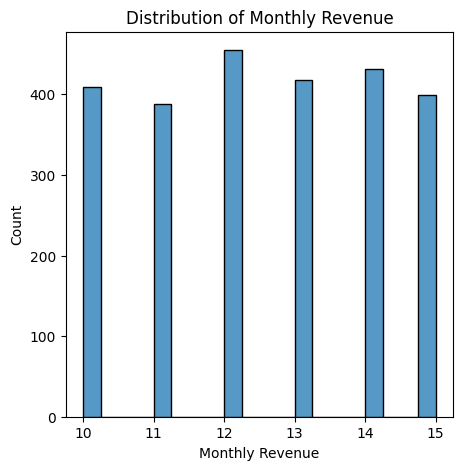

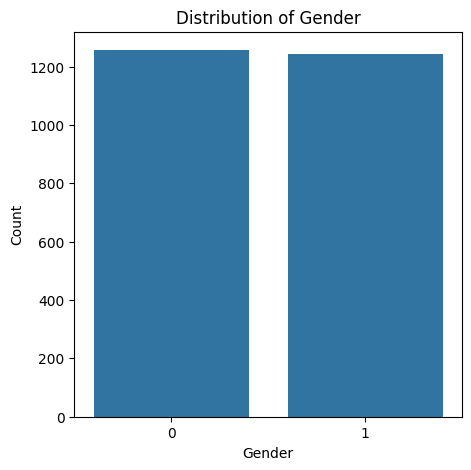

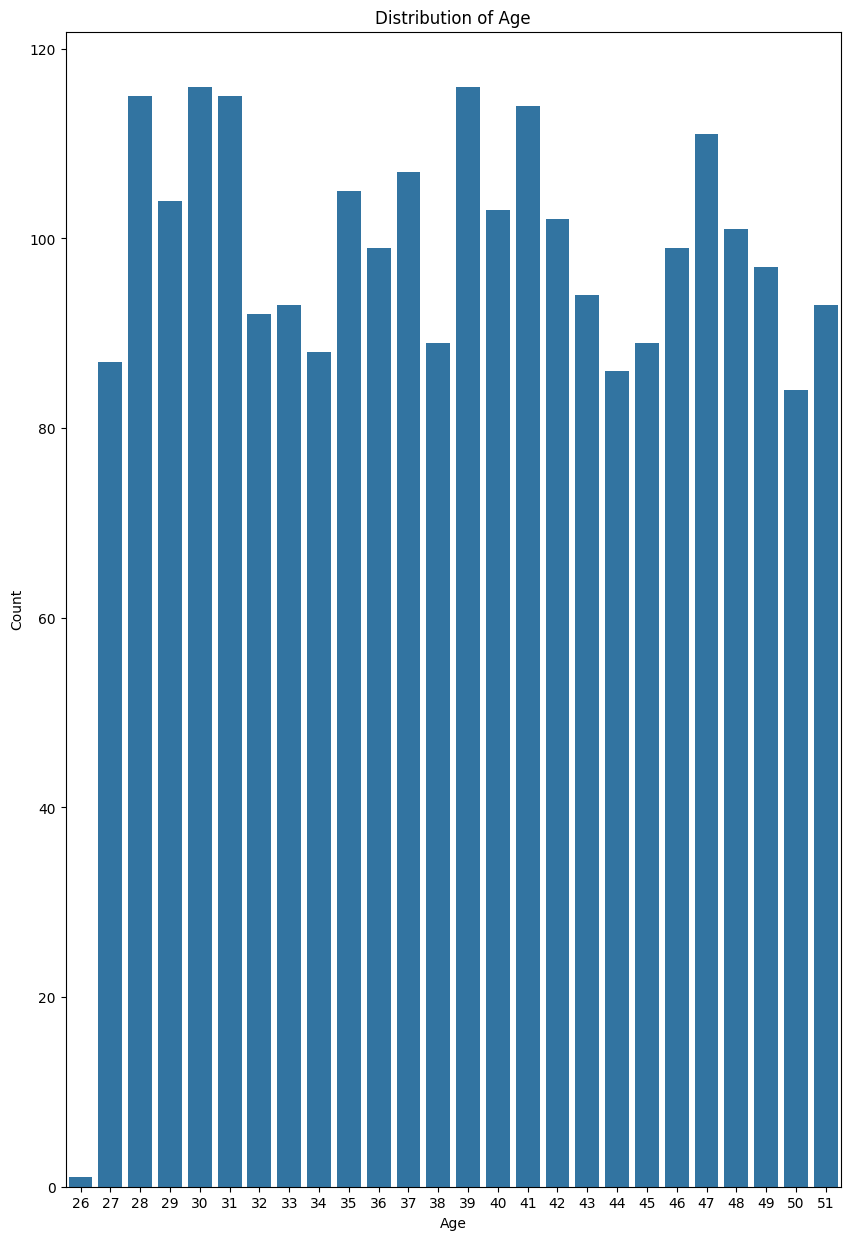

In [ ]:
#2.1 Descriptive Statistics
print(data.describe())

#2.2 Visualizations:
#Distribution of Monthly Revenue.
plt.figure(figsize=(5, 5))
sns.histplot(data['Monthly Revenue'], bins=20, kde=False)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.show()

#Distribution of Gender
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Distribution of Age
plt.figure(figsize=(10, 15))
sns.countplot(x='Age', data=data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
#3.1 Build the Model
X = pd.DataFrame(data, columns=['Age'])
Y = data['Monthly Revenue']

#Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Fit the linear regression model
model1 = LinearRegression()
model1.fit(X_train, Y_train)

#Predict on the test set
Y_predict = model1.predict(X_test)

#3.2 Model Evaluation:
r_sq = r2_score(Y_test, Y_predict)
print(f"R-squared: {r_sq}")

rmse = mean_squared_error(Y_test, Y_predict, squared=False)
print(f"RMSE: {rmse}")

R-squared: -0.006933994071707472
RMSE: 1.667725628911762


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
#4.1 Model Building:
np.random.seed(42)
data['feedback'] = np.random.choice([0, 1], size=len(data['Age']))

#Creating dataframe
df = pd.DataFrame(data)
x = df[['Age', 'Gender', 'Subscription Type']]
y_feedback = df['feedback']

# One-hot encode categorical variables
column = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Gender', 'Subscription Type'])], remainder='passthrough')
x_df = column.fit_transform(x)

#Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_feedback, test_size=0.2, random_state=42)

#Fit the logistic regression model
model2= LogisticRegression()
model2.fit(x_train, y_train)

#Predict on the test set
y_predict = model2.predict(x_test)

#4.2 Evaluation:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.518
Precision: 0.5226130653266332
Recall: 0.416
Confusion Matrix:
[[155  95]
 [146 104]]


**Part 5: Comparative Analysis and Visualization**

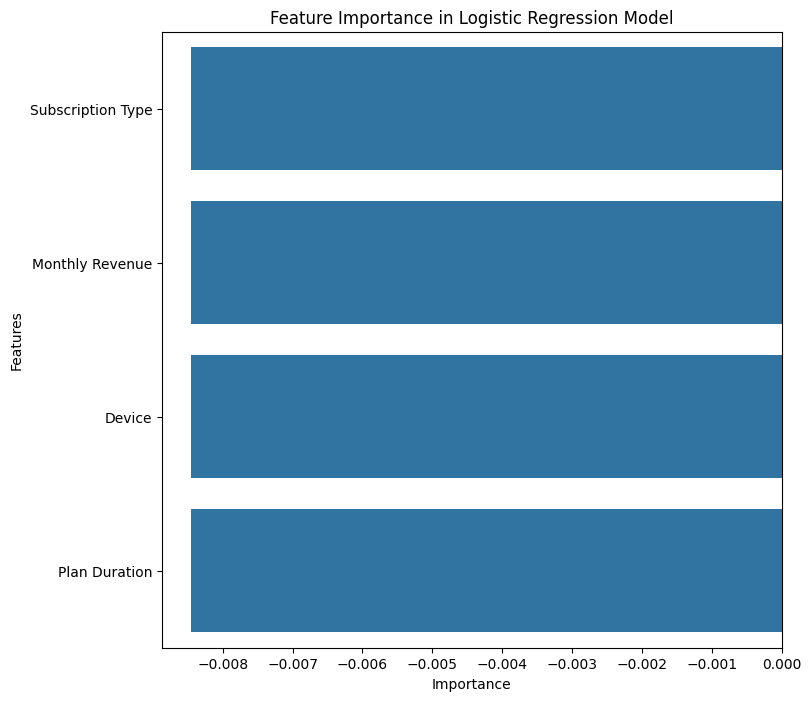

In [ ]:
#5.1 Feature importance:

#Feature importance for linear regression model
feature_importance1 = model1.coef_[0]
feature_importance_lr = pd.DataFrame({'Feature': data_features, 'Coefficient': feature_importance1})
feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=True)

#Visualize feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

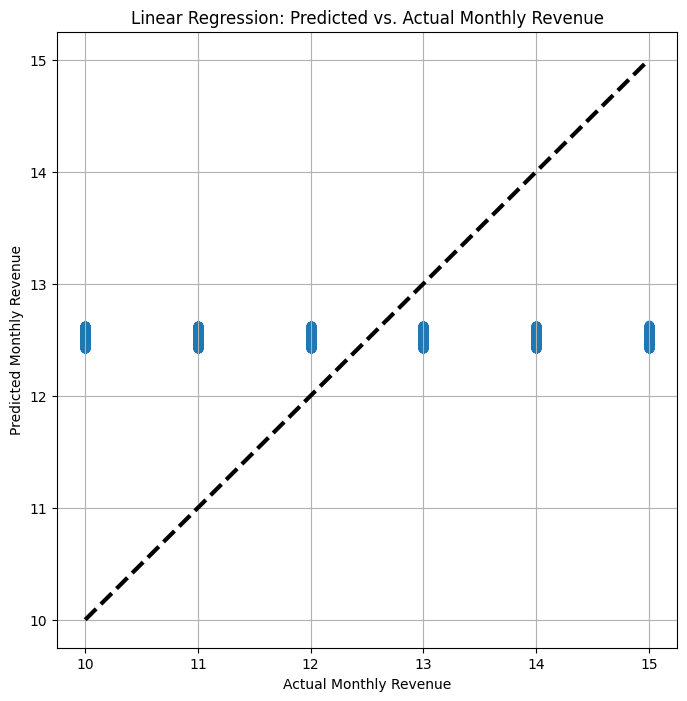

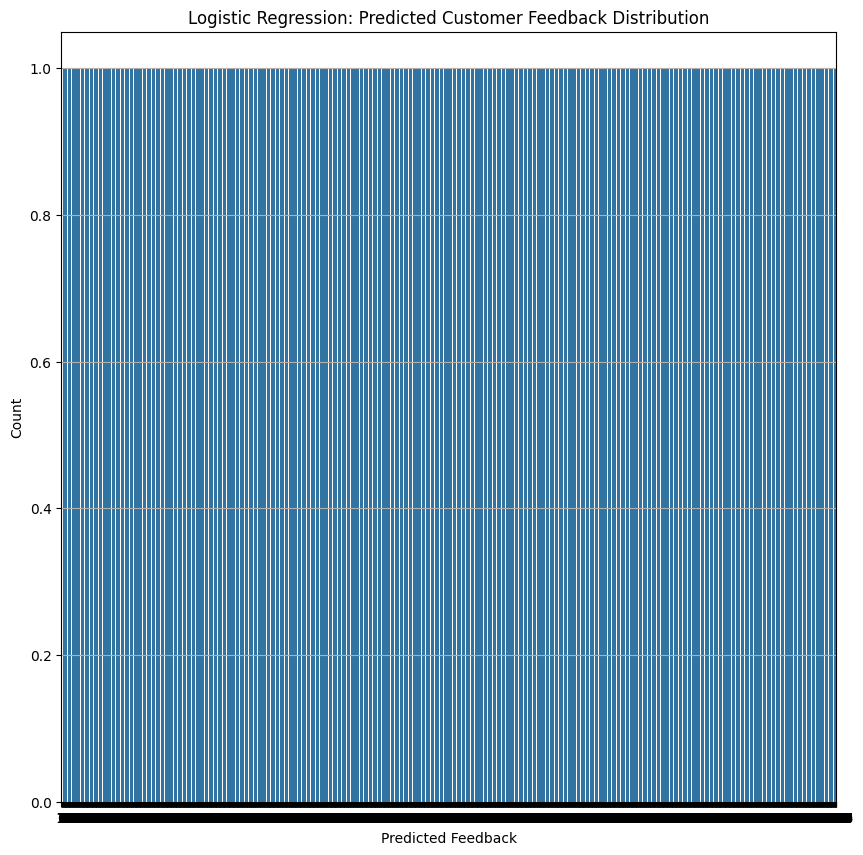

In [ ]:
#5.2 Insights:

#Linear Regression Predictions
linear_predictions = model1.predict(X)

#Logistic Regression Predictions
logistic_predictions = model2.predict(x_df)

#Predicted vs. Actual Monthly Revenue
plt.figure(figsize=(8, 8))
plt.scatter(Y, linear_predictions)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3)
plt.xlabel('Actual Monthly Revenue')
plt.ylabel('Predicted Monthly Revenue')
plt.title('Linear Regression: Predicted vs. Actual Monthly Revenue')
plt.grid(True)
plt.show()

#Distribution of predicted Customer Feedback
plt.figure(figsize=(10, 10))
sns.countplot(logistic_predictions)
plt.xlabel('Predicted Feedback')
plt.ylabel('Count')
plt.title('Logistic Regression: Predicted Customer Feedback Distribution')
plt.grid(axis='y')
plt.show()

